In [1]:
import pandas as pd
import datajoint as dj
dj.config['database.host'] = '10.86.1.219'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'retina'
dj.config["enable_python_native_blobs"] = True # Only for testing in dj0.12 (https://github.com/datajoint/datajoint-python#python-native-blobs)

%env DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE

import main
drive_path = r"\\NERFHF01/djnerf1/VEIDB/"
# data_path = r"Y:\Data"
data_path =r"V:\Data/"
ft = main.load(drive_path, data_path)

env: DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE
Connecting root@10.86.1.219:3306


In [2]:
from datetime import date

In [3]:
import seaborn as sb
sb.set_style('dark')

['2P', 'SCEphys', 'VEIDB', 'mysql', 'performance_schema', 'sys', 'test']


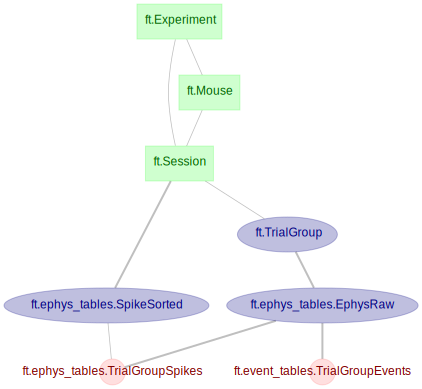

In [4]:

print(dj.list_schemas())
dj.Di(ft.schema)


In [5]:
# raw_tables.drop()

In [13]:
exp_table = ft.Experiment()
sess_table = ft.Session()
mouse_table = ft.Mouse()
trialgroup_table = ft.TrialGroup()
raw_tables = ft.ephys_tables.EphysRaw()
sorted_table = ft.ephys_tables.SpikeSorted()
events_table = ft.event_tables.TrialGroupEvents()
# raw_table = ft.ephys_tables.EphysRaw()
# spikes_table = ft.ephys_tables.Spikes()
# facerec_table = ft.behavior_tables.FaceRecording()
# facerec_avi_table = ft.behavior_tables.FaceRecording_avi()
# dlclookup_table = ft.behavior_tables.DLC_lookup()
# bodyparts_table = ft.behavior_tables.Bodyparts()

In [7]:
raw_tables.populate()

In [8]:
raw_tables

experiment_id,mouse_id,session_id,trialgroup_id,ap_path,meta_path,sync_trace,stimulus_type,length,start
01437,M02,20201214b,EXD1_0001,01437/M02/20201214b/SpikeGLX\EXD1_g0_t0.imec.ap.bin,01437/M02/20201214b/SpikeGLX\EXD1_g0_t0.imec.ap.meta,=BLOB=,EXD1,63384371,0
01437,M02,20201214b,EXD2_0001,01437/M02/20201214b/SpikeGLX\EXD2_g0_t0.imec.ap.bin,01437/M02/20201214b/SpikeGLX\EXD2_g0_t0.imec.ap.meta,=BLOB=,EXD2,80901396,63384371
01437,M02,20201214b,EXD3_0001,01437/M02/20201214b/SpikeGLX\EXD3_g0_t0.imec.ap.bin,01437/M02/20201214b/SpikeGLX\EXD3_g0_t0.imec.ap.meta,=BLOB=,EXD3,61410360,144285767
01437,M02,20201214b,OPTS_0001,01437/M02/20201214b/SpikeGLX\OPTS_g0_t0.imec.ap.bin,01437/M02/20201214b/SpikeGLX\OPTS_g0_t0.imec.ap.meta,=BLOB=,OPTS,18881820,205696127


In [9]:
sorted_table.populate()

['V:\\Data/01437/M02/20201214b/sorted', 'V:\\Data/01437/M02/20201214b/sorted\\.phy', 'V:\\Data/01437/M02/20201214b/sorted\\phy_output']
['V:\\Data/01437/M02/20201214b/sorted']
Populated sorted recordings for 20201214b in 01437


In [10]:
sorted_table

experiment_id,mouse_id,session_id,spike_times,spike_clusters,cluster_info,spike_templates,amplitudes,channel_positions,channel_map
01437,M02,20201214b,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [11]:
events_table

experiment_id,mouse_id,session_id,trialgroup_id,stimulus_type,start_abs,stims_start,stims_end,stim_triggers
01437,M02,20201214b,EXD2_0001,EXD2,63384371,30002,80376363,=BLOB=


In [12]:
experiments = [
    {'experiment_id': '01437', 'description': 'GRP-optotagged', 'experimenters': 'Anna Chrzanowska'}
]
exp_table.insert(experiments)

mice = [
    {'experiment_id': '01437', 'mouse_id': 'M02', 'sex': 'NA', 'mouse_number': 'NA'}
]
mouse_table.insert(mice)

sessions = [
    {'experiment_id': '01437', 'mouse_id': 'M02', 'session_id': '20201214b', 'session_date': date(2020, 12, 14)}
]
sess_table.insert(sessions)

DuplicateError: ("Duplicate entry '01437' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [9]:
trialgroup_table.populate()

In [10]:
trialgroup_table

experiment_id,mouse_id,session_id,trialgroup_id,stimulus_type,iteration
01437,M02,20201214b,EXD1_0001,EXD1,1
01437,M02,20201214b,EXD2_0001,EXD2,1
01437,M02,20201214b,EXD3_0001,EXD3,1
01437,M02,20201214b,OPTS_0001,OPTS,1


In [ ]:
bodyparts_table.fetch('session_id')

In [6]:
bodyparts_table.populate({'session_id': '20201007b'})

Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bDGM_0014', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet
Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDGM_0014.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDGM_0014.avi
Duration of video [s]:  868.63 , recorded with  30.0 fps!

  0%|                                                                                        | 0/26059 [00:00<?, ?it/s]


Overall # of frames:  26059  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


26260it [08:15, 53.02it/s]                                                                                             

Detected frames:  26059
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bDIf_0025', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet
Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIf_0025.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIf_0025.avi


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 52.36it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bDIM_0015', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIM_0015.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIM_0015.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 51.87it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bDIo_0020', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIo_0020.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIo_0020.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 52.37it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bDIt_0023', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIt_0023.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bDIt_0023.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 51.00it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bEXA_0010', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXA_0010.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXA_0010.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:22, 57.39it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bEXf_0024', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1301 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXf_0024.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXf_0024.avi
Duration of video [s]:  43.37 , recorded with  30.0 fps!
Overall # of frames:  1301  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:22, 58.04it/s]                                                                                              


Detected frames:  1301
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bEXo_0018', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXo_0018.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXo_0018.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:22, 57.13it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bEXP_0034', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/9998 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXP_0034.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXP_0034.avi
Duration of video [s]:  333.27 , recorded with  30.0 fps!
Overall # of frames:  9998  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


9999it [02:50, 58.59it/s]                                                                                              

Detected frames:  9998
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bEXs_0019', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXs_0019.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXs_0019.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:23, 56.99it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bEXt_0021', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXt_0021.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXt_0021.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:24, 54.06it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bEXW_0013', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXW_0013.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bEXW_0013.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:24, 53.59it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bISO_0009', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/26969 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bISO_0009.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bISO_0009.avi
Duration of video [s]:  898.97 , recorded with  30.0 fps!
Overall # of frames:  26969  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


27169it [08:23, 54.00it/s]                                                                                             

Detected frames:  26969
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bMBS_0011', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/10605 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bMBS_0011.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bMBS_0011.avi
Duration of video [s]:  353.5 , recorded with  30.0 fps!
Overall # of frames:  10605  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


10706it [03:16, 54.55it/s]                                                                                             


Detected frames:  10605
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bSCB_0017', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/18787 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bSCB_0017.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bSCB_0017.avi
Duration of video [s]:  626.23 , recorded with  30.0 fps!
Overall # of frames:  18787  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


18887it [05:48, 54.18it/s]                                                                                             

Detected frames:  18787
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bSWE_0012', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/14846 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bSWE_0012.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bSWE_0012.avi
Duration of video [s]:  494.87 , recorded with  30.0 fps!
Overall # of frames:  14846  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


14948it [04:36, 54.01it/s]                                                                                             

Detected frames:  14846
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'bXXX_0016', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/5454 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bXXX_0016.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_bXXX_0016.avi
Duration of video [s]:  181.8 , recorded with  30.0 fps!
Overall # of frames:  5454  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


5508it [01:43, 53.47it/s]                                                                                              


Detected frames:  5454
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dDGM_0006', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/26060 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDGM_0006.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDGM_0006.avi
Duration of video [s]:  868.67 , recorded with  30.0 fps!
Overall # of frames:  26060  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


26260it [08:13, 53.16it/s]                                                                                             

Detected frames:  26060
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dDIf_0033', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet
Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIf_0033.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIf_0033.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames

  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to extract posture


1313it [00:25, 51.82it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dDIM_0007', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIM_0007.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIM_0007.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 51.93it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dDIo_0028', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIo_0028.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIo_0028.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 50.64it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dDIs_0030', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIs_0030.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIs_0030.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 51.49it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dDIt_0031', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet
Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIt_0031.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dDIt_0031

1313it [00:25, 51.19it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dEXA_0002', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXA_0002.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXA_0002.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 50.63it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dEXf_0032', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXf_0032.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXf_0032.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 52.40it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dEXo_0026', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXo_0026.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXo_0026.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 52.36it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dEXs_0027', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1301 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXs_0027.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXs_0027.avi
Duration of video [s]:  43.37 , recorded with  30.0 fps!
Overall # of frames:  1301  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:24, 53.36it/s]                                                                                              


Detected frames:  1301
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dEXt_0029', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet
Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXt_0029.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXt_0029

  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 52.05it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dEXW_0005', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/1302 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXW_0005.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dEXW_0005.avi
Duration of video [s]:  43.4 , recorded with  30.0 fps!
Overall # of frames:  1302  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


1313it [00:25, 51.85it/s]                                                                                              


Detected frames:  1302
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dISO_0001', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/26969 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dISO_0001.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dISO_0001.avi
Duration of video [s]:  898.97 , recorded with  30.0 fps!
Overall # of frames:  26969  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


27169it [08:20, 54.27it/s]                                                                                             

Detected frames:  26969
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dMBS_0003', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/10605 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dMBS_0003.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dMBS_0003.avi
Duration of video [s]:  353.5 , recorded with  30.0 fps!
Overall # of frames:  10605  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


10706it [03:17, 54.29it/s]                                                                                             


Detected frames:  10605
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dSWE_0004', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                        | 0/14847 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dSWE_0004.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dSWE_0004.avi
Duration of video [s]:  494.9 , recorded with  30.0 fps!
Overall # of frames:  14847  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


14948it [04:37, 53.91it/s]                                                                                             

Detected frames:  14847
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...


The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381
Populating for:  {'experiment_id': '01381', 'session_id': '20201007b', 'stimgroup_id': 'dXXX_0008', 'name': 'Peromyscus_750'}
project_path:  dlc/Peromyscus-BramNuttin-2020-10-19
Using snapshot-750000 for model \\10.86.0.17/djnerf1/SCEphys/dlc/Peromyscus-BramNuttin-2020-10-19\dlc-models\iteration-0\PeromyscusOct19-trainset95shuffle1
Initializing ResNet


  0%|                                                                                         | 0/5454 [00:00<?, ?it/s]

Starting to analyze %  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dXXX_0008.avi
\\10.86.0.17\djnerf1\SCEphys\videos  already exists!
Loading  \\10.86.0.17/djnerf1/SCEphys/videos\01381_20201007b_dXXX_0008.avi
Duration of video [s]:  181.8 , recorded with  30.0 fps!
Overall # of frames:  5454  found with (before cropping) frame dimensions:  644 484
Starting to extract posture


5508it [01:42, 53.56it/s]                                                                                              


Detected frames:  5454
Saving results in \\10.86.0.17\djnerf1\SCEphys\videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
DLC analysis completed for 20201007b in 01381


In [34]:
stimgroup_table.populate()

In [16]:
(stimgroup_table & {'experiment_id': '01285'}).fetch('stimulus_type', 'iteration')

[array(['bDGM', 'bDIf', 'bDIM', 'bDIo', 'bDIs', 'bDIt', 'bEXA', 'bEXf',
        'bEXo', 'bEXP', 'bEXP', 'bEXs', 'bEXt', 'bEXW', 'bISO', 'bMBS',
        'bSCB', 'bSWE', 'bXXX', 'dDGM', 'dDIf', 'dDIM', 'dDIo', 'dDIs',
        'dDIt', 'dEXA', 'dEXf', 'dEXo', 'dEXs', 'dEXt', 'dEXW', 'dISO',
        'dMBS', 'dSWE', 'dXXX'], dtype=object),
 array([ 6, 31,  7, 26, 28, 29,  2, 30, 24, 33, 34, 25, 27,  5,  1,  3, 32,
         4, 35, 13, 22, 14, 17, 19, 20,  9, 21, 15, 16, 18, 12,  8, 10, 11,
        23], dtype=int64)]

In [5]:
facerec_table.populate({'experiment_id': '01381'})

Importing stimulus bISO 1
Face recording for 20200923a 01381, bISO 1 NOT found!
Importing stimulus bMBS 3
20200923_run001
['20200923_run001_00000000.tif', '20200923_run001_00000001.tif', '20200923_run001_00000002.tif', '20200923_run001_00000003.tif', '20200923_run001_00000004.tif', '20200923_run001_00000005.tif', '20200923_run001_00000006.tif', '20200923_run001_00000007.tif', '20200923_run001_00000008.tif', '20200923_run001_00000009.tif', '20200923_run001_00000010.tif', '20200923_run001_00000011.tif', '20200923_run001_00000012.tif']
(256, 484, 644)
Loading 20200923_run001_00000001.tif
(256, 484, 644)
Loading 20200923_run001_00000002.tif
(256, 484, 644)
Loading 20200923_run001_00000003.tif
(256, 484, 644)
Loading 20200923_run001_00000004.tif
(256, 484, 644)
Loading 20200923_run001_00000005.tif
(256, 484, 644)
Loading 20200923_run001_00000006.tif
(256, 484, 644)
Loading 20200923_run001_00000007.tif
(256, 484, 644)
Loading 20200923_run001_00000008.tif
(256, 484, 644)
Loading 20200923_run0

(174, 484, 644)
Merged tiffs
Inserting part 0 for dDIf, 22
Populated a face recording for 20200923a in 01381
Importing stimulus dDIi 23
20200923_run022
['20200923_run022_00000000.tif', '20200923_run022_00000001.tif']
(256, 484, 644)
Loading 20200923_run022_00000001.tif
(174, 484, 644)
Merged tiffs
Inserting part 0 for dDIi, 23
Populated a face recording for 20200923a in 01381
Importing stimulus dDIM 14
20200923_run013
['20200923_run013_00000000.tif', '20200923_run013_00000001.tif']
(256, 484, 644)
Loading 20200923_run013_00000001.tif
(174, 484, 644)
Merged tiffs
Inserting part 0 for dDIM, 14
Populated a face recording for 20200923a in 01381
Importing stimulus dDIo 17
20200923_run016
['20200923_run016_00000000.tif', '20200923_run016_00000001.tif']
(256, 484, 644)
Loading 20200923_run016_00000001.tif
(174, 484, 644)
Merged tiffs
Inserting part 0 for dDIo, 17
Populated a face recording for 20200923a in 01381
Importing stimulus dDIs 19
20200923_run018
['20200923_run018_00000000.tif', '2020

(256, 484, 644)
Loading 20200923_run009_00000001.tif
(256, 484, 644)
Loading 20200923_run009_00000002.tif
(256, 484, 644)
Loading 20200923_run009_00000003.tif
(256, 484, 644)
Loading 20200923_run009_00000004.tif
(256, 484, 644)
Loading 20200923_run009_00000005.tif
(256, 484, 644)
Loading 20200923_run009_00000006.tif
(256, 484, 644)
Loading 20200923_run009_00000007.tif
(256, 484, 644)
Loading 20200923_run009_00000008.tif
(256, 484, 644)
Loading 20200923_run009_00000009.tif
(256, 484, 644)
Loading 20200923_run009_00000010.tif
(256, 484, 644)
Loading 20200923_run009_00000011.tif
(256, 484, 644)
Loading 20200923_run009_00000012.tif
(256, 484, 644)
Loading 20200923_run009_00000013.tif
(256, 484, 644)
Loading 20200923_run009_00000014.tif
(256, 484, 644)
Merged tiffs
Inserting part 0 for dSWE, 11
(256, 484, 644)
Loading 20200923_run009_00000016.tif
(256, 484, 644)
Loading 20200923_run009_00000017.tif
(256, 484, 644)
Loading 20200923_run009_00000018.tif
(256, 484, 644)
Loading 20200923_run009_

(256, 484, 644)
Loading 20201007_run049_00000072.tif
(256, 484, 644)
Loading 20201007_run049_00000073.tif
(256, 484, 644)
Loading 20201007_run049_00000074.tif
(256, 484, 644)
Merged tiffs
Inserting part 4 for bDGM, 14
(256, 484, 644)
Loading 20201007_run049_00000076.tif
(256, 484, 644)
Loading 20201007_run049_00000077.tif
(256, 484, 644)
Loading 20201007_run049_00000078.tif
(256, 484, 644)
Loading 20201007_run049_00000079.tif
(256, 484, 644)
Loading 20201007_run049_00000080.tif
(256, 484, 644)
Loading 20201007_run049_00000081.tif
(256, 484, 644)
Loading 20201007_run049_00000082.tif
(256, 484, 644)
Loading 20201007_run049_00000083.tif
(256, 484, 644)
Loading 20201007_run049_00000084.tif
(256, 484, 644)
Loading 20201007_run049_00000085.tif
(256, 484, 644)
Loading 20201007_run049_00000086.tif
(256, 484, 644)
Loading 20201007_run049_00000087.tif
(256, 484, 644)
Loading 20201007_run049_00000088.tif
(256, 484, 644)
Loading 20201007_run049_00000089.tif
(256, 484, 644)
Merged tiffs
Inserting p

(256, 484, 644)
Loading 20201007_run068_00000017.tif
(256, 484, 644)
Loading 20201007_run068_00000018.tif
(256, 484, 644)
Loading 20201007_run068_00000019.tif
(256, 484, 644)
Loading 20201007_run068_00000020.tif
(256, 484, 644)
Loading 20201007_run068_00000021.tif
(256, 484, 644)
Loading 20201007_run068_00000022.tif
(256, 484, 644)
Loading 20201007_run068_00000023.tif
(256, 484, 644)
Loading 20201007_run068_00000024.tif
(256, 484, 644)
Loading 20201007_run068_00000025.tif
(256, 484, 644)
Loading 20201007_run068_00000026.tif
(256, 484, 644)
Loading 20201007_run068_00000027.tif
(256, 484, 644)
Loading 20201007_run068_00000028.tif
(256, 484, 644)
Loading 20201007_run068_00000029.tif
(256, 484, 644)
Merged tiffs
Inserting part 1 for bEXP, 34
(256, 484, 644)
Loading 20201007_run068_00000031.tif
(256, 484, 644)
Loading 20201007_run068_00000032.tif
(256, 484, 644)
Loading 20201007_run068_00000033.tif
(256, 484, 644)
Loading 20201007_run068_00000034.tif
(256, 484, 644)
Loading 20201007_run068_

(256, 484, 644)
Loading 20201007_run044_00000031.tif
(256, 484, 644)
Loading 20201007_run044_00000032.tif
(256, 484, 644)
Loading 20201007_run044_00000033.tif
(256, 484, 644)
Loading 20201007_run044_00000034.tif
(256, 484, 644)
Loading 20201007_run044_00000035.tif
(256, 484, 644)
Loading 20201007_run044_00000036.tif
(256, 484, 644)
Loading 20201007_run044_00000037.tif
(256, 484, 644)
Loading 20201007_run044_00000038.tif
(256, 484, 644)
Loading 20201007_run044_00000039.tif
(256, 484, 644)
Loading 20201007_run044_00000040.tif
(256, 484, 644)
Loading 20201007_run044_00000041.tif
(256, 484, 644)
Loading 20201007_run044_00000042.tif
(256, 484, 644)
Loading 20201007_run044_00000043.tif
(256, 484, 644)
Loading 20201007_run044_00000044.tif
(256, 484, 644)
Merged tiffs
Inserting part 2 for bISO, 9
(256, 484, 644)
Loading 20201007_run044_00000046.tif
(256, 484, 644)
Loading 20201007_run044_00000047.tif
(256, 484, 644)
Loading 20201007_run044_00000048.tif
(256, 484, 644)
Loading 20201007_run044_0

(256, 484, 644)
Loading 20201007_run052_00000001.tif
(256, 484, 644)
Loading 20201007_run052_00000002.tif
(256, 484, 644)
Loading 20201007_run052_00000003.tif
(256, 484, 644)
Loading 20201007_run052_00000004.tif
(256, 484, 644)
Loading 20201007_run052_00000005.tif
(256, 484, 644)
Loading 20201007_run052_00000006.tif
(256, 484, 644)
Loading 20201007_run052_00000007.tif
(256, 484, 644)
Loading 20201007_run052_00000008.tif
(256, 484, 644)
Loading 20201007_run052_00000009.tif
(256, 484, 644)
Loading 20201007_run052_00000010.tif
(256, 484, 644)
Loading 20201007_run052_00000011.tif
(256, 484, 644)
Loading 20201007_run052_00000012.tif
(256, 484, 644)
Loading 20201007_run052_00000013.tif
(256, 484, 644)
Loading 20201007_run052_00000014.tif
(256, 484, 644)
Merged tiffs
Inserting part 0 for bSCB, 17
(256, 484, 644)
Loading 20201007_run052_00000016.tif
(256, 484, 644)
Loading 20201007_run052_00000017.tif
(256, 484, 644)
Loading 20201007_run052_00000018.tif
(256, 484, 644)
Loading 20201007_run052_

Loading 20201007_run047_00000044.tif
(256, 484, 644)
Merged tiffs
Inserting part 2 for bSWE, 12
(256, 484, 644)
Loading 20201007_run047_00000046.tif
(256, 484, 644)
Loading 20201007_run047_00000047.tif
(256, 484, 644)
Loading 20201007_run047_00000048.tif
(256, 484, 644)
Loading 20201007_run047_00000049.tif
(256, 484, 644)
Loading 20201007_run047_00000050.tif
(256, 484, 644)
Loading 20201007_run047_00000051.tif
(256, 484, 644)
Loading 20201007_run047_00000052.tif
(256, 484, 644)
Loading 20201007_run047_00000053.tif
(256, 484, 644)
Loading 20201007_run047_00000054.tif
(256, 484, 644)
Loading 20201007_run047_00000055.tif
(256, 484, 644)
Loading 20201007_run047_00000056.tif
(256, 484, 644)
Loading 20201007_run047_00000057.tif
(254, 484, 644)
Merged tiffs
Inserting part 3 for bSWE, 12
Populated a face recording for 20201007b in 01381
Importing stimulus bXXX 16
20201007_run051
['20201007_run051_00000000.tif', '20201007_run051_00000001.tif', '20201007_run051_00000002.tif', '20201007_run051_00

(256, 484, 644)
Loading 20201007_run041_00000040.tif
(256, 484, 644)
Loading 20201007_run041_00000041.tif
(256, 484, 644)
Loading 20201007_run041_00000042.tif
(256, 484, 644)
Loading 20201007_run041_00000043.tif
(256, 484, 644)
Loading 20201007_run041_00000044.tif
(256, 484, 644)
Merged tiffs
Inserting part 2 for dDGM, 6
(256, 484, 644)
Loading 20201007_run041_00000046.tif
(256, 484, 644)
Loading 20201007_run041_00000047.tif
(256, 484, 644)
Loading 20201007_run041_00000048.tif
(256, 484, 644)
Loading 20201007_run041_00000049.tif
(256, 484, 644)
Loading 20201007_run041_00000050.tif
(256, 484, 644)
Loading 20201007_run041_00000051.tif
(256, 484, 644)
Loading 20201007_run041_00000052.tif
(256, 484, 644)
Loading 20201007_run041_00000053.tif
(256, 484, 644)
Loading 20201007_run041_00000054.tif
(256, 484, 644)
Loading 20201007_run041_00000055.tif
(256, 484, 644)
Loading 20201007_run041_00000056.tif
(256, 484, 644)
Loading 20201007_run041_00000057.tif
(256, 484, 644)
Loading 20201007_run041_0

Populated a face recording for 20201007b in 01381
Importing stimulus dEXs 27
20201007_run061
['20201007_run061_00000000.tif', '20201007_run061_00000001.tif', '20201007_run061_00000002.tif', '20201007_run061_00000003.tif', '20201007_run061_00000004.tif', '20201007_run061_00000005.tif']
(256, 484, 644)
Loading 20201007_run061_00000001.tif
(256, 484, 644)
Loading 20201007_run061_00000002.tif
(256, 484, 644)
Loading 20201007_run061_00000003.tif
(256, 484, 644)
Loading 20201007_run061_00000004.tif
(256, 484, 644)
Loading 20201007_run061_00000005.tif
(21, 484, 644)
Merged tiffs
Inserting part 0 for dEXs, 27
Populated a face recording for 20201007b in 01381
Importing stimulus dEXt 29
20201007_run063
['20201007_run063_00000000.tif', '20201007_run063_00000001.tif', '20201007_run063_00000002.tif', '20201007_run063_00000003.tif', '20201007_run063_00000004.tif', '20201007_run063_00000005.tif']
(256, 484, 644)
Loading 20201007_run063_00000001.tif
(256, 484, 644)
Loading 20201007_run063_00000002.tif

Loading 20201007_run035_00000055.tif
(256, 484, 644)
Loading 20201007_run035_00000056.tif
(256, 484, 644)
Loading 20201007_run035_00000057.tif
(256, 484, 644)
Loading 20201007_run035_00000058.tif
(256, 484, 644)
Loading 20201007_run035_00000059.tif
(256, 484, 644)
Merged tiffs
Inserting part 3 for dISO, 1
(256, 484, 644)
Loading 20201007_run035_00000061.tif
(256, 484, 644)
Loading 20201007_run035_00000062.tif
(256, 484, 644)
Loading 20201007_run035_00000063.tif
(256, 484, 644)
Loading 20201007_run035_00000064.tif
(256, 484, 644)
Loading 20201007_run035_00000065.tif
(256, 484, 644)
Loading 20201007_run035_00000066.tif
(256, 484, 644)
Loading 20201007_run035_00000067.tif
(256, 484, 644)
Loading 20201007_run035_00000068.tif
(256, 484, 644)
Loading 20201007_run035_00000069.tif
(256, 484, 644)
Loading 20201007_run035_00000070.tif
(256, 484, 644)
Loading 20201007_run035_00000071.tif
(256, 484, 644)
Loading 20201007_run035_00000072.tif
(256, 484, 644)
Loading 20201007_run035_00000073.tif
(256

(256, 484, 644)
Loading 20201007_run039_00000001.tif
(256, 484, 644)
Loading 20201007_run039_00000002.tif
(256, 484, 644)
Loading 20201007_run039_00000003.tif
(256, 484, 644)
Loading 20201007_run039_00000004.tif
(256, 484, 644)
Loading 20201007_run039_00000005.tif
(256, 484, 644)
Loading 20201007_run039_00000006.tif
(256, 484, 644)
Loading 20201007_run039_00000007.tif
(256, 484, 644)
Loading 20201007_run039_00000008.tif
(256, 484, 644)
Loading 20201007_run039_00000009.tif
(256, 484, 644)
Loading 20201007_run039_00000010.tif
(256, 484, 644)
Loading 20201007_run039_00000011.tif
(256, 484, 644)
Loading 20201007_run039_00000012.tif
(256, 484, 644)
Loading 20201007_run039_00000013.tif
(256, 484, 644)
Loading 20201007_run039_00000014.tif
(256, 484, 644)
Merged tiffs
Inserting part 0 for dSWE, 4
(256, 484, 644)
Loading 20201007_run039_00000016.tif
(256, 484, 644)
Loading 20201007_run039_00000017.tif
(256, 484, 644)
Loading 20201007_run039_00000018.tif
(256, 484, 644)
Loading 20201007_run039_0

In [5]:
(facerec_avi_table).populate({'experiment_id': '01381'})

Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'bISO_0001'}
Parts order: []
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'bMBS_0003'}
Parts order: [0]
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'bSCB_0035'}
Parts order: [0 1]
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'bSWE_0004'}
Parts order: [0 1]
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'dDGM_0013'}
Parts order: [0 1 2]
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'dDIf_0022'}
Parts order: [0]
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'dDIi_0023'}
Parts order: [0]
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'dDIM_0014'}
Parts order: [0]
Key:  {'experiment_id': '01381', 'session_id': '20200923a', 'stimgroup_id': 'dDIo_0017'}
Parts order: [0]
Key:  {'experiment_id': '01381', 'sessi

In [33]:
experiments = [
#     {'experiment_id': '01131', 'description': '...', 'experimenters': 'Katja, Arnau'},
#     {'experiment_id': '01127', 'description': '...', 'experimenters': 'Katja, Arnau'},
    {'experiment_id': '01437', 'description': 'GRP-optotagged', 'experimenters': 'Anna'}
]
# exp_table.insert(experiments)

sessions = [
#     {'experiment_id': '01131', 'session_id': '20191101a', 'session_date': '20191101'},
#     {'experiment_id': '01127', 'session_id': '20191031a', 'session_date': '20191031'},
    {'experiment_id': '01437', 'session_id': 'GRP-optotagged', 'experimenters': 'Anna'}
    {'experiment_id': '01381', 'session_id': '20201007b', 'session_date': '20201007'}
#     {'experiment_id': '01381', 'session_id': '20200923a', 'session_date': '20200923'}
]
sess_table.insert(sessions)

In [32]:
(sess_table & {'experiment_id': '01381', 'session_id': '20201007a'}).delete()

About to delete:
`SCEphys`.`session`: 1 items
Proceed? [yes, No]: yes
Committed.


In [12]:
# (exp_table & {'experiment_id': '01285'}).delete()
# (sess_table & {'experiment_id': '01285'}).delete()
# import numpy as np
# np.unique(exp_table.fetch('experiment_id'))

About to delete:
`SCEphys`.`session`: 1 items
Proceed? [yes, No]: yes
Committed.


In [1]:
raw_table

NameError: name 'raw_table' is not defined

In [8]:
raw_table.populate()

\\10.86.0.17/farrow2020/Data/01381/20200923a/spikeGLX
nChan: 385, nFileSamp: 27260952
nChan: 385, nFileSamp: 1429944
nChan: 385, nFileSamp: 9976632
nChan: 385, nFileSamp: 14833644
nChan: 385, nFileSamp: 1380624
nChan: 385, nFileSamp: 25590432
nChan: 385, nFileSamp: 1376820
nChan: 385, nFileSamp: 27599088
nChan: 385, nFileSamp: 1568376
nChan: 385, nFileSamp: 9954744
nChan: 385, nFileSamp: 14976252
nChan: 385, nFileSamp: 1368516
nChan: 385, nFileSamp: 25607544
nChan: 385, nFileSamp: 1393392
nChan: 385, nFileSamp: 1357320
nChan: 385, nFileSamp: 1356204
nChan: 385, nFileSamp: 1353876
nChan: 385, nFileSamp: 1395108
nChan: 385, nFileSamp: 1432836
nChan: 385, nFileSamp: 1346772
nChan: 385, nFileSamp: 1411896
nChan: 385, nFileSamp: 1472544
nChan: 385, nFileSamp: 1355700
nChan: 385, nFileSamp: 1351884
nChan: 385, nFileSamp: 1364100
nChan: 385, nFileSamp: 1343304
nChan: 385, nFileSamp: 1378872
nChan: 385, nFileSamp: 1349052
nChan: 385, nFileSamp: 1353456
nChan: 385, nFileSamp: 1346580
nChan: 385

DuplicateError: ("Duplicate entry '01381-20201007b-2' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [ ]:
raw_table.populate()

In [18]:
spikes_table.populate()

Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Error occurred when loading stimulus start and end. index 0 is out of bounds for axis 0 with size 0
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 01285
Populated a trial for 20201007a in 0128

In [5]:
class SWEP:
    def __init__(self, stim_times):
        self.stimuli = {
            'pres': stim_times[::4],
            'starts': stim_times[1::4], 
            'stops': stim_times[2::4], 
            'posts': stim_times[3::4]
        }
    
    def visualize_on_plot(self, ax):
        for pre in self.stimuli['pres']:
            ax.axvline(x=pre, c='gray')
        for post in self.stimuli['posts']:
            ax.axvline(x=post, c='gray')
        for start in self.stimuli['starts']:
            ax.axvline(x=start, c='g')
        for stop in self.stimuli['stops']:
            ax.axvline(x=stop, c='r')
        
        
class LOMS:
    def __init__(self, stim_times):
        self.stimuli = {
            'starts': stim_times[1::3][:-1], 
            'stops': stim_times[2::3][:-1], 
            'posts': stim_times[3::3], 
            'trial_start': [stim_times[0]], 
            'trial_end': [stim_times[-1]]
        }
    
    def visualize_on_plot(self, ax):
#         for pre in self.stimuli['posts']:
#             ax.axvline(x=pre, c='gray')
#         for post in self.stimuli['trial_start']:
#             ax.axvline(x=post, c='gray')
#         for post in self.stimuli['trial_end']:
#             ax.axvline(x=post, c='gray')
        for start in self.stimuli['starts']:
            ax.axvline(x=start, c='g')
        for stop in self.stimuli['stops']:
            ax.axvline(x=stop, c='r')

class EXPA:
    def __init__(self, stim_times):
        self.stimuli = {
            'starts': stim_times[1::3][:-1], 
            'stops': stim_times[2::3][:-1], 
            'posts': stim_times[3::3], 
            'trial_start': [stim_times[0]], 
            'trial_end': [stim_times[-1]]
        }
    
    def visualize_on_plot(self, ax):
        for pre in self.stimuli['posts']:
            ax.axvline(x=pre, c='gray')
        for post in self.stimuli['trial_start']:
            ax.axvline(x=post, c='gray')
        for post in self.stimuli['trial_end']:
            ax.axvline(x=post, c='gray')
        for start in self.stimuli['starts']:
            ax.axvline(x=start, c='g')
        for stop in self.stimuli['stops']:
            ax.axvline(x=stop, c='r')

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
spikes_table

experiment_id,session_id,id,stimulus_type,start_abs,stim_trial_start,stim_trial_end,stim_triggers,clusters,cluster_annot
01127,20191031a,1,OPTS,0,29999,219795,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,2,EXPA,18524436,30004,1248650,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,3,MSDS,20029584,30002,14854144,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,4,SSDS,35259624,30004,23788511,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,5,EXPW,60583404,29996,1308641,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,1,OPTS,0,30001,219668,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,2,EXPA,18501084,30000,1248640,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,3,MSDS,19993872,-1,-1,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,4,SSDS,34717500,30001,23772954,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,5,EXPW,58628676,29997,1308628,=BLOB=,=BLOB=,=BLOB=


In [21]:
hdf_path = r'E:\bEXA_0002.h5'
import h5py

with h5py.File(hdf_path, 'r') as f:
    print(f.keys())
    print(f['sweep_0002']['analogScans'])
    hdf = f['sweep_0002']['analogScans'][()]
    print("HDF shape:", hdf.shape)
    

<KeysViewHDF5 ['header', 'sweep_0002']>
<HDF5 dataset "analogScans": shape (4, 860000), type "<i2">
HDF shape: (4, 860000)


In [39]:
key = {'session_id': '20201007a', 'stimulus_type': 'bEXA'}
sync = (raw_table & key).fetch('sync_trace')
print(sync[0].shape)
sync = np.diff(sync[0], prepend=0)

(16, 1520580)


In [57]:
stim_trace = np.diff(hdf[3], prepend=0)
stim_trace = stim_trace>5000

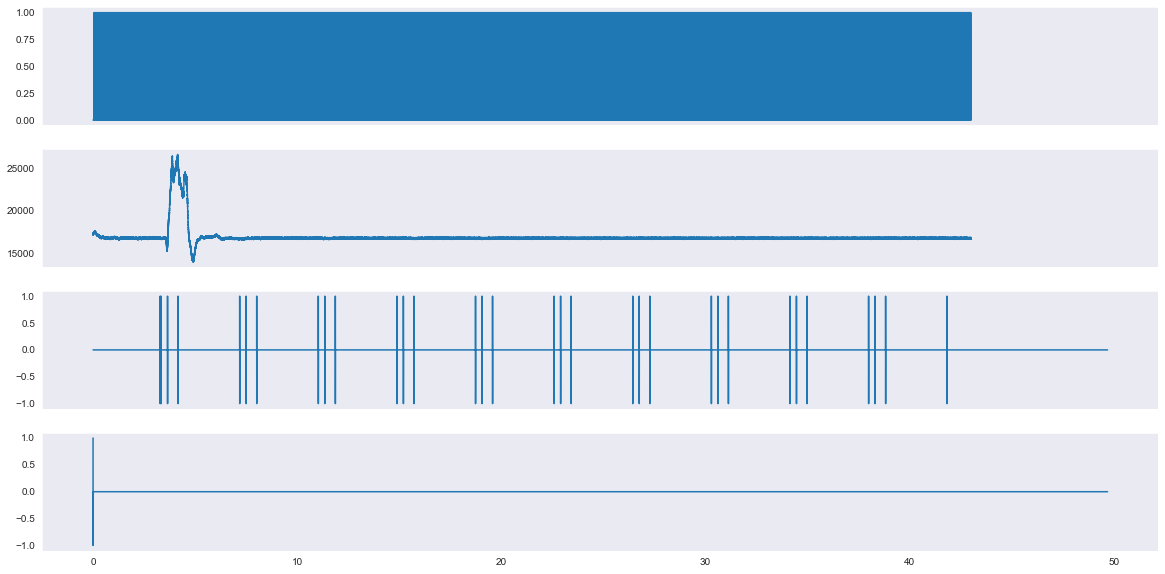

In [59]:
fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
axs[0].plot(np.arange(0, len(stim_trace.T))/20000, stim_trace.T)
axs[1].plot(np.arange(0, len(hdf[2].T))/20000, hdf[2].T)

axs[2].plot(np.arange(0, len(sync[7][30005:]))/30000, sync[7][30005:])
axs[3].plot(np.arange(0, len(sync[0][30005:]))/30000, sync[0][30005:])

plt.show()

In [61]:
# Number of frames in 43 seconds => around 30FPS
np.sum(stim_trace==1)

1302

In [51]:
# Start of trial pulse
np.where(sync[0] ==1)

(array([30005], dtype=int64),)

In [37]:
sync.shape

(1,)

248


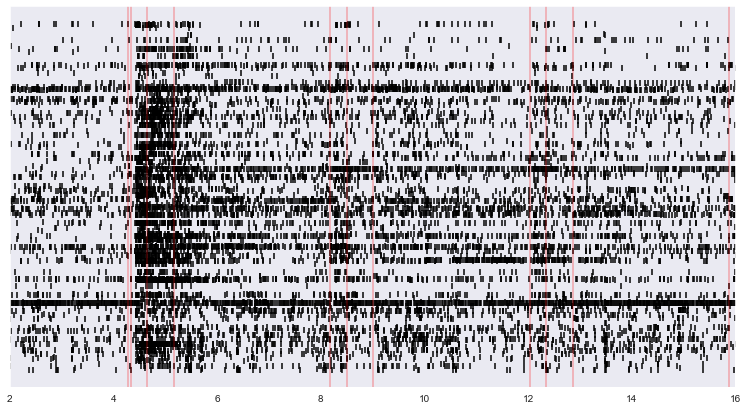

In [24]:
# key = {'session_id': '20191031a', 'stimulus_type': 'EXPA'}
key = {'session_id': '20201007a', 'stimulus_type': 'bEXA'}
# TODO: Get neuronal activity during stimuli type EXPA in session 0000
clusters, cluster_annot = (spikes_table & key).fetch1('clusters', 'cluster_annot')
# TODO: Get stimulus signals during stimuli type EXPA in session 0000
stim_triggers = (spikes_table & key).fetch1('stim_triggers')

# TODO: Match both neuronal activity and stimulus signals
# TODO: Visualize trials (activity around stimulus onsets and ends)
data = []
for c in cluster_annot:
    if cluster_annot[c] == 'good':
        data.append((c, clusters.get(c)))
fig, ax = plt.subplots(figsize=(13, 7))
print(len(data))
for i, (cluster, cl_spike_times) in enumerate(data[:]):
    if cl_spike_times is not None and isinstance(cl_spike_times, np.ndarray):
#         if i <= 216 and i > 194:
#             fr, _ = np.histogram(cl_spike_times, bins=np.arange(0, np.array(cl_spike_times)[-1], 30*50))
#             plt.plot(fr*10+cluster)
#         ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster, marker='|', c='k') # SCATTER PLOT
#         if i <= 216 and i > 194:
#             ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster*1, marker='|', c='k') # SCATTER PLOT
#         elif i <= 194 and i > 89:
#             ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster*1, marker='|', c='k') # SCATTER PLOT
#         elif i <= 89 and i > 1:
        ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster*1, marker='|', c='k') # SCATTER PLOT
for trigger in stim_triggers:
#     ax.axvline(trigger/(30*50), ymin=0, ymax=1, c='r')
    ax.axvline(trigger/30000, ymin=0, ymax=1, c='r', alpha=0.3) # FOR SCATTER PLOT SET DIVIDOR TO 30000
plt.xlim(2,16)
# plt.ylim(0, max_cluster)
# plt.xticks([])
plt.yticks([])
# plt.xlabel('time')
# plt.ylabel('neurons')
# plt.savefig('spikes_SC.png', dpi=200) 
plt.show()
# TODO: Get all units and order by channel position 

In [50]:
sync_trace = (raw_table & key).fetch1('sync_trace')

In [53]:
sync_trace.shape
s2 = np.diff(sync_trace, prepend=0)

(16, 1339860)

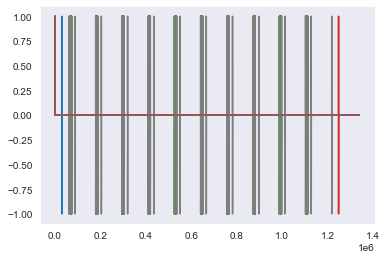

In [70]:
plt.plot(s2.T)
plt.show()

In [46]:
start = (spikes_table & key).fetch1('stim_trial_end')
start

1248645

In [9]:
stim_path = r'C:\Users\bramn\Documents\Projects\DatajointSCEphys\0001EXPA0002_Collision_StimLog20191031T113305.mat'
import scipy.io
mat = scipy.io.loadmat(stim_path, squeeze_me=True)

In [10]:
# print(mat['StimLog'])
print(mat['StimLog']['Stim'])
begin_time = mat['StimLog']['BeginTime']
stim_info = mat['StimLog']['Stim']
starts_looming = np.atleast_1d(stim_info)[0]['StartLooming']
stops_looming = np.atleast_1d(stim_info)[0]['StopLooming'][0]

[(2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 1.0309808254241943, 1.347656011581421)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 4.881157875061035, 5.197556018829346)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 8.731091022491455, 9.047513008117676)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 12.580997943878174, 12.897419929504395)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 16.43096089363098, 16.747339963912964)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 20.280900955200195, 20.597317934036255)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 24.130800008773804, 24.447237014770508)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 27.980737924575806, 28.297294855117798)
 (2800.0, 100.0, 0.0, 0.5, 0.0, 0.0, 125.0, 100.0, 0.0, 8100.0, 0.0, 0.0, 31.83067297935486, 3

In [11]:
begin_time

array(1572517985.266256, dtype=object)

In [12]:
spikes_table

experiment_id,session_id,id,stimulus_type,start_abs,stim_trial_start,stim_trial_end,stim_triggers,clusters,cluster_annot
01127,20191031a,1,OPTS,0,29999,219795,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,2,EXPA,18524436,30004,1248650,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,3,MSDS,20029584,30002,14854144,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,4,SSDS,35259624,30004,23788511,=BLOB=,=BLOB=,=BLOB=
01127,20191031a,5,EXPW,60583404,29996,1308641,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,1,OPTS,0,30001,219668,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,2,EXPA,18501084,30000,1248640,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,3,MSDS,19993872,-1,-1,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,4,SSDS,34717500,30001,23772954,=BLOB=,=BLOB=,=BLOB=
01131,20191101a,5,EXPW,58628676,29997,1308628,=BLOB=,=BLOB=,=BLOB=


In [97]:
""" Get all spikes from an entire session"""
# min_neuron = 89
# max_neuron = 194
# min_neuron = 194
# max_neuron = 216
min_neuron = 0
max_neuron = 416
fr_binsize = 50
# key = {'session_id': '20191031a', 'stimulus_type': 'EXPA'}
key = {'session_id': '20201007a', 'stimulus_type': 'dEXA'}

# spike_times, spike_clusters, cluster_info = (sorted_table & key).fetch1('spike_times', 'spike_clusters', 'cluster_info')
clusters, cluster_annot, stim_triggers = (spikes_table & key).fetch1('clusters', 'cluster_annot', 'stim_triggers')
# cluster_annot = cluster_info['group']

clusters = {k: v for k, v in clusters.items() if cluster_annot[k]=='good'}

""" Only keep SC neurons"""
# cluster_annot = {k: v for k, v in cluster_annot.items() if k>min_neuron and k<=max_neuron}
# manager = SpikeManager(spike_times, spike_clusters, cluster_annot)

' Only keep SC neurons'

In [98]:
stim_triggers
expa_stim = EXPA(stim_triggers)

In [99]:
def split_in_trials(spikes, stim_obj, before=2, after=3):
    trials = []
    for i, (start, post) in enumerate(zip(expa_stim.stimuli['starts'], expa_stim.stimuli['posts'])):
        new_clusters = {}
        for c, spikes in clusters.items():
            new_clusters[c] = spikes[(spikes>start-(30000*before)) & (spikes<post+(30000*after))] - (start-30000*before)
        trials.append(new_clusters)
    return trials

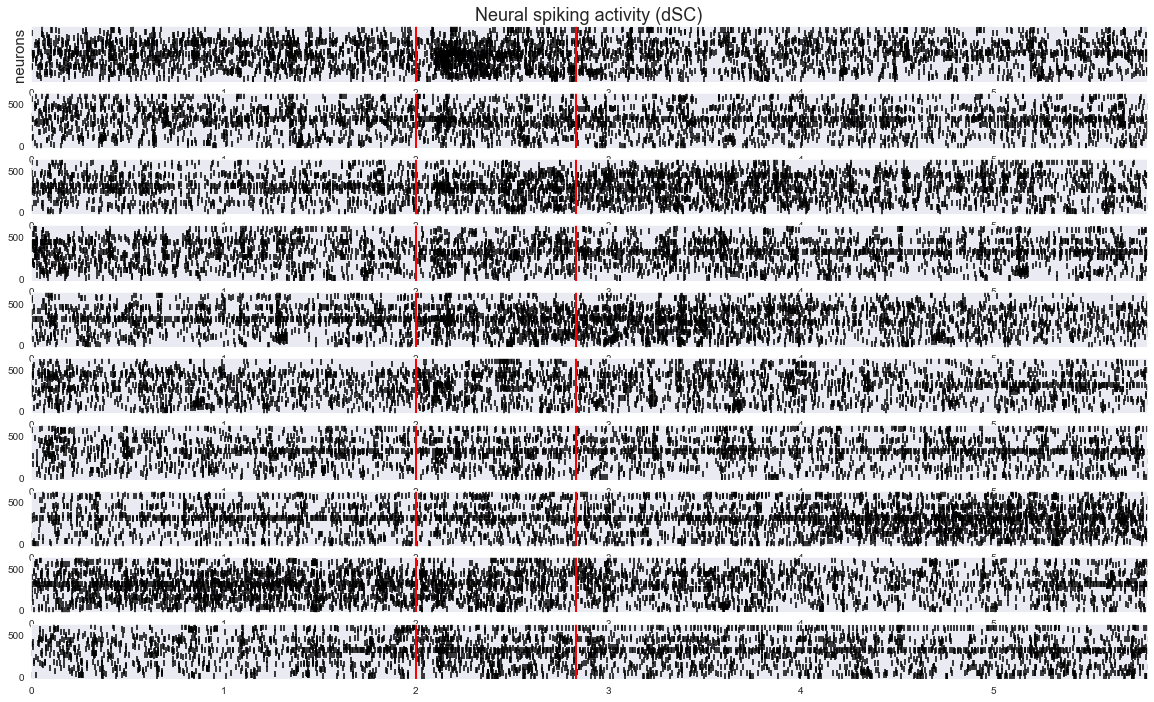

In [100]:
trials = split_in_trials(clusters, stim_triggers)
trial_avg_fr = {}
fig, axs = plt.subplots(10, 1, figsize=(20, 12))
for trial_i, trial in enumerate(trials):
    last_spike_time = max([s[-1] for _,s in trial.items() if isinstance(s, np.ndarray) and len(s)>0])
#     firing_rates = {}
    for idx, (c, spikes) in enumerate(trial.items()):
        if idx < min_neuron or idx >= max_neuron:
            continue
        fr, _ = np.histogram(spikes, bins=np.arange(0, last_spike_time, (30000/1000)*fr_binsize))
        fr = fr - np.mean(fr)
        if c in trial_avg_fr:
            trial_avg_fr[c] += fr
        else:
            trial_avg_fr[c] = fr
#     for c, firing_rate in firing_rates.items():
#         axs[trial_i].plot(firing_rate + c*5)
        

#         if trial_i == 0:
        axs[trial_i].scatter(spikes/30000, np.ones_like(spikes)*c, marker='|', c='k')
        axs[trial_i].axvline(2, c='r')
        axs[trial_i].axvline(last_spike_time/30000-3, c='r')
#             axs[trial_i].xticks
        
# for c, firing_rate in trial_avg_fr.items():
#     if np.std(firing_rate) > 0.5:
#         axs[1].plot((np.arange(len(firing_rate))*fr_binsize)/1000, firing_rate-np.mean(firing_rate) + c*2, c='k', alpha=0.5)
# axs[1].axvline(2, c='r')
# axs[1].axvline(last_spike_time/30000-3, c='r')

axs[0].set(yticks=[])
axs[0].set_xlabel(xlabel='time (s)', fontsize=15)
axs[0].set_ylabel(ylabel='neurons', fontsize=15)
axs[0].set_title('Neural spiking activity (dSC)', fontsize=18)

# axs[1].set(yticks=[])
# axs[1].set_xlabel(xlabel='time (s)', fontsize=15)
# axs[1].set_ylabel(ylabel='neurons', fontsize=15)
# axs[1].set_title('Trial-averaged firing rates (dSC)', fontsize=18)
# axs[trial_i+2].imshow(np.expand_dims(cluster_labels, axis=0))

for ax in axs:
    ax.set(xlim=(0, 5.8))

# plt.savefig('spikingactivity_gfpa.png', dpi=200)
plt.show()

In [17]:
min_length = min([len(s) for _, s in trial_avg_fr.items()])
firing_rates = np.zeros((len(trial_avg_fr), min_length))
for i, (unit, spikes) in enumerate(trial_avg_fr.items()):
    if np.std(spikes) != 0:
        firing_rates[i] = (spikes - np.mean(spikes))/np.std(spikes)

In [18]:
firing_rates.shape

(216, 116)

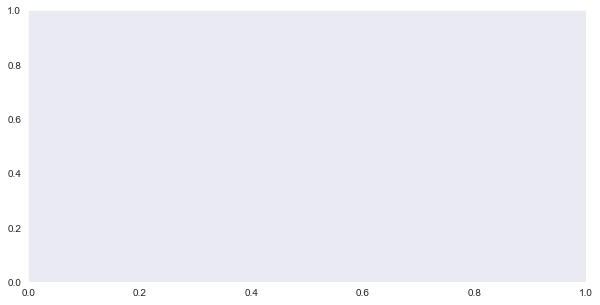

In [271]:
""" Visualize spikes"""
spikes = manager.get_spikes(start=0, end=1000000)
spikes = spikes[min_neuron:max_neuron]
fig, ax = plt.subplots(figsize=(10, 5))
for i, unit in enumerate(spikes):
    ax.scatter(unit, np.ones_like(unit)*i, marker='|', c='k')
plt.show()

In [15]:
""" Convert spikes to firing rates"""
last_spike_time = max([s[-1] for s in spikes if isinstance(s, np.ndarray) and len(s)>0])
firing_rates = np.zeros((len(spikes), int(last_spike_time*(1000/(30000*fr_binsize)))))
print(last_spike_time)
print(firing_rates.shape)
for i, unit_spikes in enumerate(spikes):
    fr, _ = np.histogram(unit_spikes, bins=np.arange(0, last_spike_time, (30000/1000)*fr_binsize))
    firing_rates[i] = fr - np.mean(fr)

999496
(22, 666)


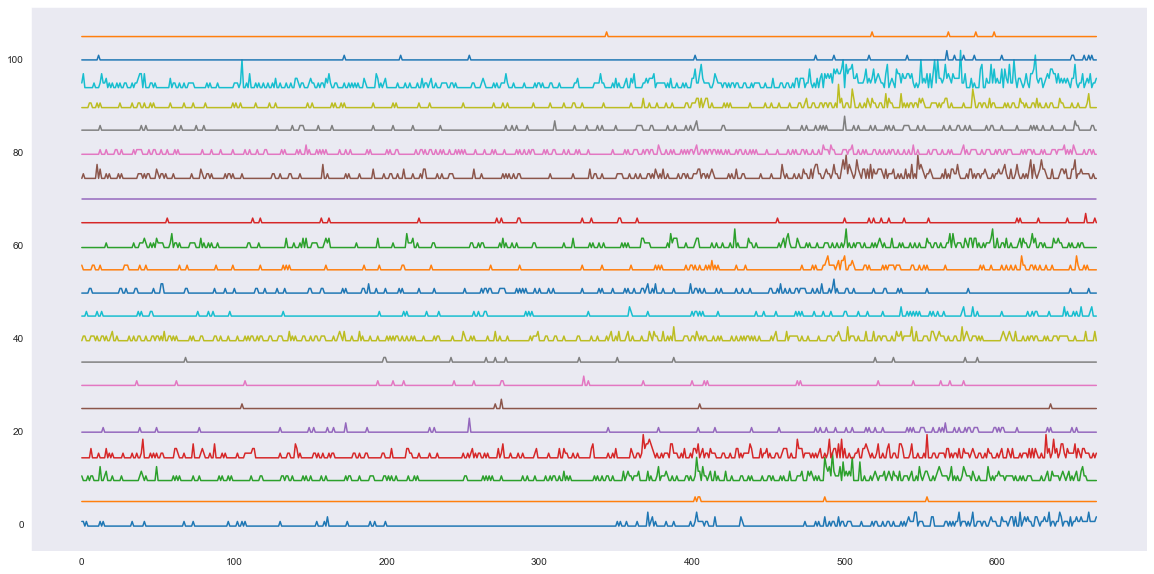

In [16]:
""" Visualize firing rates """
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for i, firing_rate in enumerate(firing_rates):
    plt.plot(firing_rate + i*5)
plt.show()

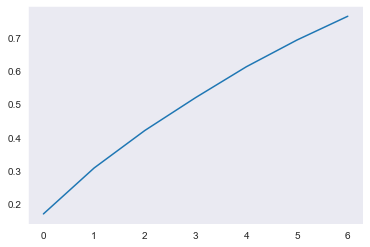

In [279]:
""" Perform PCA on spikes"""
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(firing_rates.T)
embeddings = pca.transform(firing_rates.T)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

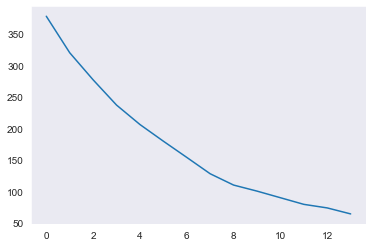

In [280]:
# ELBOW method for deciding K in K-means
import sklearn.cluster

ssqs = []
for k in range(1, 15):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    kmeans.fit(embeddings)
    ssqs.append(kmeans.inertia_)
    
plt.plot(ssqs)

In [281]:
""" Perform K-means on the PCA embeddings"""

kmeans = sklearn.cluster.KMeans(n_clusters=6, init='k-means++', max_iter=1000)
kmeans.fit(embeddings)
cluster_labels = kmeans.labels_

In [282]:
embeddings.shape

(38, 7)

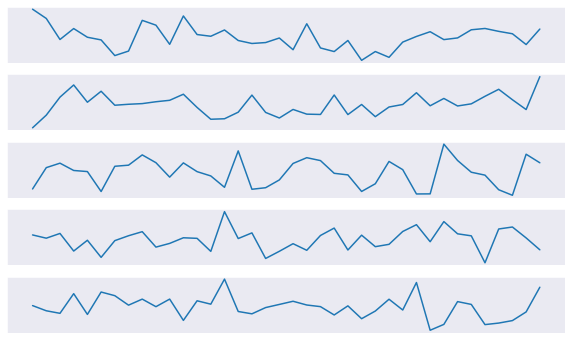

In [300]:
fig, axs = plt.subplots(5, 1, figsize=(10, 6))
for i, emb in enumerate(embeddings.T[:5]):
    axs[i].plot(emb)
    axs[i].set(xticks=[])
    axs[i].set(yticks=[])
plt.savefig('PCA_lowdim.png', dpi=100)
# plt.show()

' 3d plot'

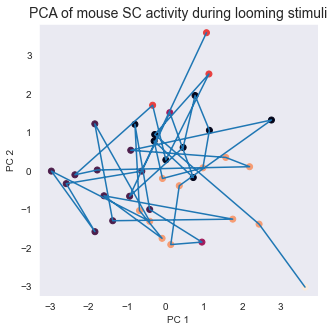

In [232]:
""" 2d plot"""
plt.figure(figsize=(5, 5))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1], c=cluster_labels)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.plot(embeddings[:, 0], embeddings[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA of mouse SC activity during looming stimuli', fontsize=14)
plt.savefig('SC_PCA_trialavg_ssc.png', dpi=100)

""" 3d plot"""
# from mpl_toolkits import mplot3d
# %matplotlib notebook
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')
# ax.set(yticks=[], xticks=[], zticks=[])
# ax.scatter3D(embeddings[:,0], embeddings[:,1], embeddings[:,2], c=cluster_labels)

In [19]:
import neo
from neo.core import Block, Unit, SpikeTrain

In [20]:
# np.zeros(#num trials, #num neurons, #num timesteps)
# spiketrain_trials = np.zeros(shape=(len(trials), len(trials[0]), 140000))
# spiketrain_trials = np.zeros(shape=(len(trials), len(trials[0])))
trials_neo = []
for trial_i, trial in enumerate(trials):
    spiketrains = []
    for c_i, (c, spikes) in enumerate(trial.items()):
        if c_i < min_neuron or c_i >= max_neuron:
            continue
#         spiketrain = np.zeros(140000)
#         spiketrain[spikes[spikes<140000]] = 1
#         spiketrain_trials[trial_i, c_i] = spiketrain
#         print(spikes[-1])
#         spikes = spikes[(spikes>=60000) & (spikes<=120000)]
#         spiketrains.append(SpikeTrain(times=spikes/30, units='ms', t_start=60000/30, t_stop=120000/30))
        spiketrains.append(SpikeTrain(times=spikes/30, units='ms', t_start=0, t_stop=175000/30))

    trials_neo.append(spiketrains)

In [21]:
len(trials_neo)

10

In [29]:
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa import GPFA
import quantities as pq

bin_size = 20 * pq.ms
latent_dimensionality = 2

gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)
gpfa_2dim.fit(trials_neo[6:])

c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 18 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 10 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 32 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 22 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))


Initializing parameters using factor analysis...

Fitting GPFA model...
Fitting has converged after 375 EM iterations.)


GPFA(x_dim=2)

In [30]:
trajectories = gpfa_2dim.transform(trials_neo[:6])


c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 27 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 26 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 28 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 22 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\site-packages\elephant\conversion.py:495: UserWarning: Binning discarded 24 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))
c:\users\bramn\anaconda3\envs\analysis\lib\si

In [61]:
start_s = 0
stop_s = 5
start_stim_s = 2
stop_stim_s = 3
len(trajectories[0][0][int(start_s*1000/bin_size):int(stop_s*1000/bin_size)])
# from scipy.interpolate import interp1d
# f2 = interp1d(trajectories[0][0], trajectories[0][1], kind='cubic')
# xnew = np.linspace(min(trajectories[0][1]), max(trajectories[0][1]), num=50, endpoint=True)

250

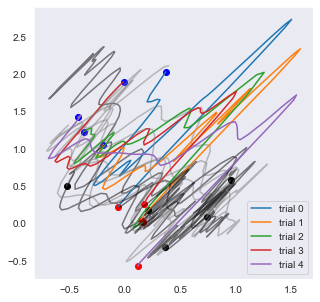

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for idx, single_trial_trajectory in enumerate(trajectories[1:]):
    # Plot pre
    ax.plot(single_trial_trajectory[0,int(start_s*1000/bin_size):int(start_stim_s*1000/bin_size)], single_trial_trajectory[1,int(start_s*1000/bin_size):int(start_stim_s*1000/bin_size)], '-', c='k', alpha=0.5)
    
    # Plot during
    ax.plot(single_trial_trajectory[0,int(start_stim_s*1000/bin_size):int(stop_stim_s*1000/bin_size)], single_trial_trajectory[1,int(start_stim_s*1000/bin_size):int(stop_stim_s*1000/bin_size)], '-', label=f'trial {idx}')

    # Plot post
    ax.plot(single_trial_trajectory[0,int(stop_stim_s*1000/bin_size):int(stop_s*1000/bin_size)], single_trial_trajectory[1,int(stop_stim_s*1000/bin_size):int(stop_s*1000/bin_size)], '-', c='gray', alpha=0.5)
#         ax.plot(single_trial_trajectory[0,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], single_trial_trajectory[1,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], '-', c='gray', alpha=0.5, label=f'trial {idx}')

    ax.scatter(single_trial_trajectory[0,int(start_stim_s*1000/bin_size)], single_trial_trajectory[1,int(start_stim_s*1000/bin_size)], c='r')
    ax.scatter(single_trial_trajectory[0,int(stop_stim_s*1000/bin_size)-1], single_trial_trajectory[1,int(stop_stim_s*1000/bin_size)-1], c='b')
    ax.scatter(single_trial_trajectory[0,int(stop_s*1000/bin_size)-1], single_trial_trajectory[1,int(stop_s*1000/bin_size)-1], c='k')

# average_trajectory = np.mean(trajectories, axis=0)
# ax.plot(average_trajectory[0,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], average_trajectory[1,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], '-', alpha=0.5, label='test', lw=2)
    
plt.legend()
# plt.savefig('gpfa_0_5.png', dpi=200)
plt.show()

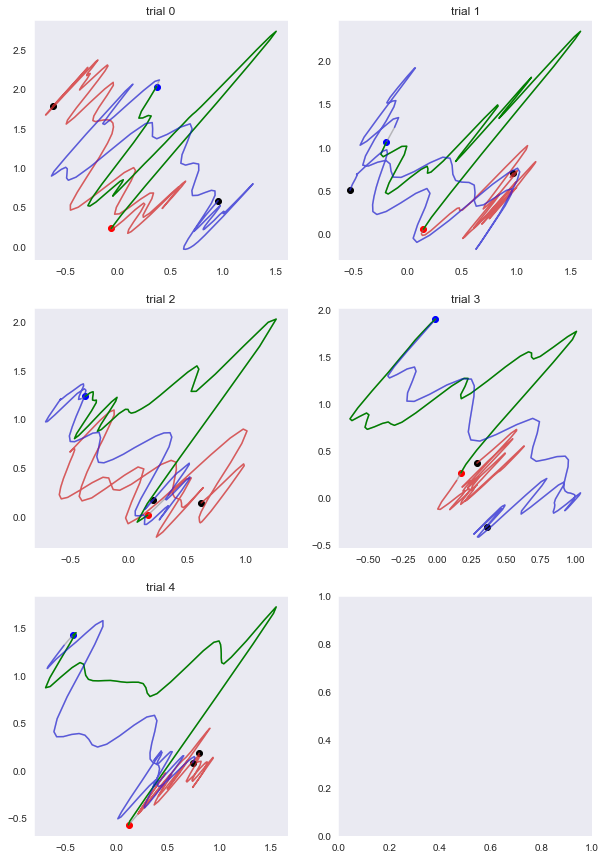

In [79]:
fig, axs = plt.subplots(len(trajectories)//2, 2, figsize=(10, 15))

for idx, single_trial_trajectory in enumerate(trajectories[1:]):
    axs[idx//2, idx%2].set(title=f"trial {idx}")
    # Plot full in gray
    axs[idx//2, idx%2].plot(single_trial_trajectory[0,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], single_trial_trajectory[1,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], '-', c='gray', alpha=0.5, label=f'trial {idx}')

    # Plot pre
    axs[idx//2, idx%2].plot(single_trial_trajectory[0,int(start_s*1000/bin_size):int(start_stim_s*1000/bin_size)], single_trial_trajectory[1,int(start_s*1000/bin_size):int(start_stim_s*1000/bin_size)], '-', c='r', alpha=0.5)
    
    # Plot during
    axs[idx//2, idx%2].plot(single_trial_trajectory[0,int(start_stim_s*1000/bin_size):int(stop_stim_s*1000/bin_size)], single_trial_trajectory[1,int(start_stim_s*1000/bin_size):int(stop_stim_s*1000/bin_size)], '-', c='g', label=f'trial {idx}')

    # Plot post
    axs[idx//2, idx%2].plot(single_trial_trajectory[0,int(stop_stim_s*1000/bin_size):int(stop_s*1000/bin_size)], single_trial_trajectory[1,int(stop_stim_s*1000/bin_size):int(stop_s*1000/bin_size)], '-', c='b', alpha=0.5)
    
    axs[idx//2, idx%2].scatter(single_trial_trajectory[0,int(start_s*1000/bin_size)], single_trial_trajectory[1,int(start_s*1000/bin_size)], c='k')
    axs[idx//2, idx%2].scatter(single_trial_trajectory[0,int(start_stim_s*1000/bin_size)], single_trial_trajectory[1,int(start_stim_s*1000/bin_size)], c='r')
    axs[idx//2, idx%2].scatter(single_trial_trajectory[0,int(stop_stim_s*1000/bin_size)-1], single_trial_trajectory[1,int(stop_stim_s*1000/bin_size)-1], c='b')
    axs[idx//2, idx%2].scatter(single_trial_trajectory[0,int(stop_s*1000/bin_size)-1], single_trial_trajectory[1,int(stop_s*1000/bin_size)-1], c='k')

# average_trajectory = np.mean(trajectories, axis=0)
# ax.plot(average_trajectory[0,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], average_trajectory[1,int(start_s*1000/bin_size):int(stop_s*1000/bin_size)], '-', alpha=0.5, label='test', lw=2)
# plt.savefig('gpfa_0_5.png', dpi=200)
plt.show()

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

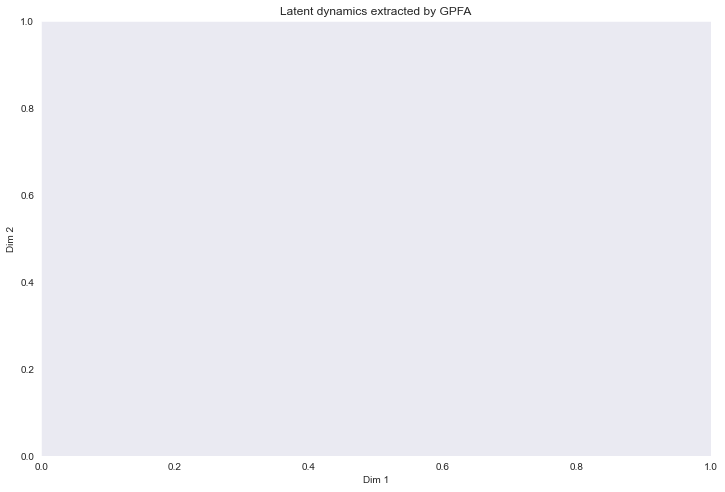

In [58]:
f, ax2 = plt.subplots(1, 1, figsize=(12, 8))

linewidth_single_trial = 0.5
color_single_trial = 'C0'
alpha_single_trial = 0.5

linewidth_trial_average = 2
color_trial_average = 'C1'

ax2.set_title('Latent dynamics extracted by GPFA')
ax2.set_xlabel('Dim 1')
ax2.set_ylabel('Dim 2')
ax2.set_aspect(1)
# single trial trajectories
for single_trial_trajectory in trajectories:
    ax2.scatter(single_trial_trajectory[0,0:2], single_trial_trajectory[1,0:2], 'o')
    ax2.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-', lw=linewidth_single_trial, c=color_single_trial, alpha=alpha_single_trial)
# trial averaged trajectory
average_trajectory = np.mean(trajectories, axis=0)
ax2.plot(average_trajectory[0], average_trajectory[1], '-', lw=linewidth_trial_average, c=color_trial_average, label='Trial averaged trajectory')
ax2.legend()

plt.tight_layout()
plt.show()

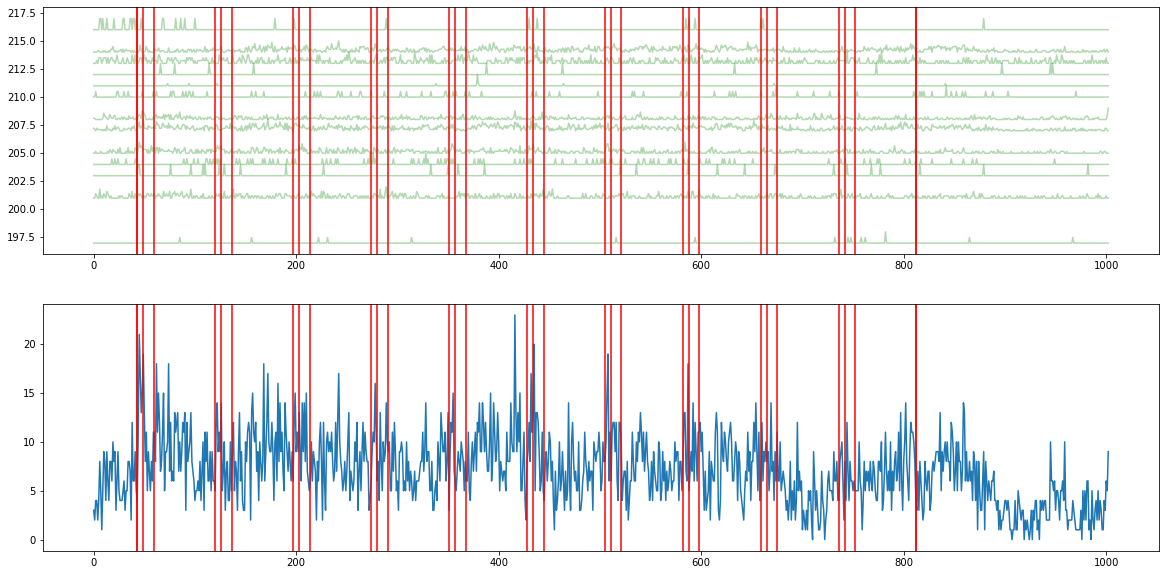

ValueError: operands could not be broadcast together with shapes (1003,14) (22,) 

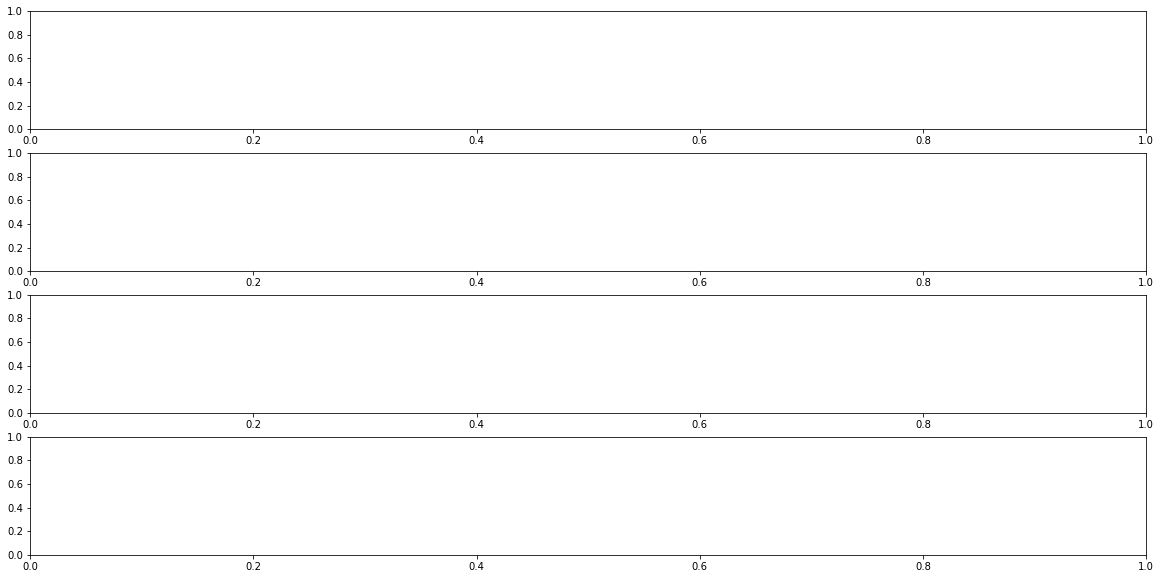

In [26]:
key = {'session_id': '20191031a', 'stimulus_type': 'EXPA'}

clusters, cluster_annot = (spikes_table & key).fetch1('clusters', 'cluster_annot')
cluster_annot = {k: v for k, v in cluster_annot.items() if k>min_neuron and k<=max_neuron}
stim_triggers = (spikes_table & key).fetch1('stim_triggers')

data = []
for c in cluster_annot:
    if cluster_annot[c] == 'good':
        data.append((c, clusters.get(c)))
last_spike_time = max([s[-1] for _, s in data if isinstance(s, np.ndarray) and len(s)>0])
firing_rates = np.zeros((len(data), int(last_spike_time*(1000/(30000*fr_binsize)))))
        
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
for i, (cluster, cl_spike_times) in enumerate(data[:]):
    if cl_spike_times is not None and isinstance(cl_spike_times, np.ndarray):
        fr, _ = np.histogram(cl_spike_times, bins=np.arange(0, last_spike_time, 30*fr_binsize))
        firing_rates[i] = fr
#         plt.plot(fr, c='k', alpha=0.3)
        if cluster <= 216 and cluster > 194:
            axs[0].plot(fr/max(fr)+cluster, c='g', alpha=0.3)
#             ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster, marker='|', c='g') # SCATTER PLOT
        elif cluster <= 194 and cluster > 89:
            axs[0].plot(fr/max(fr)+cluster, c='b', alpha=0.3)
#             ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster, marker='|', c='b')
# axs[1].plot(np.mean(firing_rates, axis=0))
axs[1].plot(np.sum(firing_rates, axis=0))
for trigger in stim_triggers:
    axs[0].axvline(trigger/(30*fr_binsize), ymin=0, ymax=1, c='r')
    axs[1].axvline(trigger/(30*fr_binsize), ymin=0, ymax=1, c='r')
#     ax.axvline(trigger/30000, ymin=0, ymax=1, c='r') # FOR SCATTER PLOT SET DIVIDOR TO 30000
# plt.savefig('fr20_sSC_dSC.png', dpi=200)

plt.show()
fig, axs = plt.subplots(4, 1, figsize=(20, 10))
embeddings = pca.transform(firing_rates.T)
axs[0].plot(embeddings[:,0], alpha=0.8)
axs[1].plot(embeddings[:,1], alpha=0.8)
axs[2].plot(embeddings[:,2], alpha=0.8)
cluster_labels = kmeans.predict(embeddings)

import scipy.signal
smoothed_cluster_labels = np.expand_dims(scipy.signal.medfilt(cluster_labels, kernel_size=5), axis=0)
# smoothed_cluster_labels = scipy.signal.medfilt(np.expand_dims(cluster_labels, axis=0), kernel_size=5)
axs[3].imshow(smoothed_cluster_labels,aspect="auto",  extent=[0, len(cluster_labels), -2, 2])
for ax in axs:
    for trigger in stim_triggers:
        ax.axvline(trigger/(30*fr_binsize), ymin=0, ymax=1, c='r')
# plt.savefig('pca_fr20.png', dpi=200)
# plt.show()


In [199]:
stim_triggers

array([  63441,   63933,   73433,   88939,  179438,  188932,  204432,
        294937,  304432,  319937,  410435,  419930,  435436,  525936,
        535429,  550935,  641435,  650930,  666434,  756933,  766429,
        781934,  872433,  881931,  897433,  987932,  997426, 1012928,
       1103431, 1112926, 1128430, 1218506, 1218577], dtype=int64)

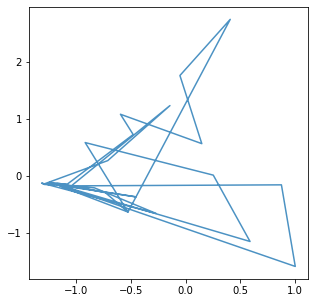

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.plot(embeddings[190:220,0], embeddings[190:220,1], alpha=0.8)
plt.show()

# Verify with full sorted spikes!

In [11]:
class SpikeManager:
    def __init__(self, spike_times, spike_clusters, cluster_annot):
        self.spikes = []
        for c in cluster_annot:
            if cluster_annot[c] == 'good':
                self.spikes.append(spike_times[spike_clusters==c])
    
    def get_spikes(self, start=None, end=None):
        if start is None and end is None:
            subset = self.spikes
        elif start is None:
            subset = [unit[(unit<end)] for unit in self.spikes]
        elif end is None:
            subset = [unit[(unit>=start)] for unit in self.spikes]
        else:
            subset = [unit[(unit>=start) & (unit<end)] for unit in self.spikes]
        return subset

In [59]:
key = {'session_id': '20200327e'}
spike_times, spike_clusters, cluster_info = (sorted_table & key).fetch1('spike_times', 'spike_clusters', 'cluster_info')
cluster_annot = cluster_info['group']

In [72]:
manager = SpikeManager(spike_times, spike_clusters, cluster_annot)

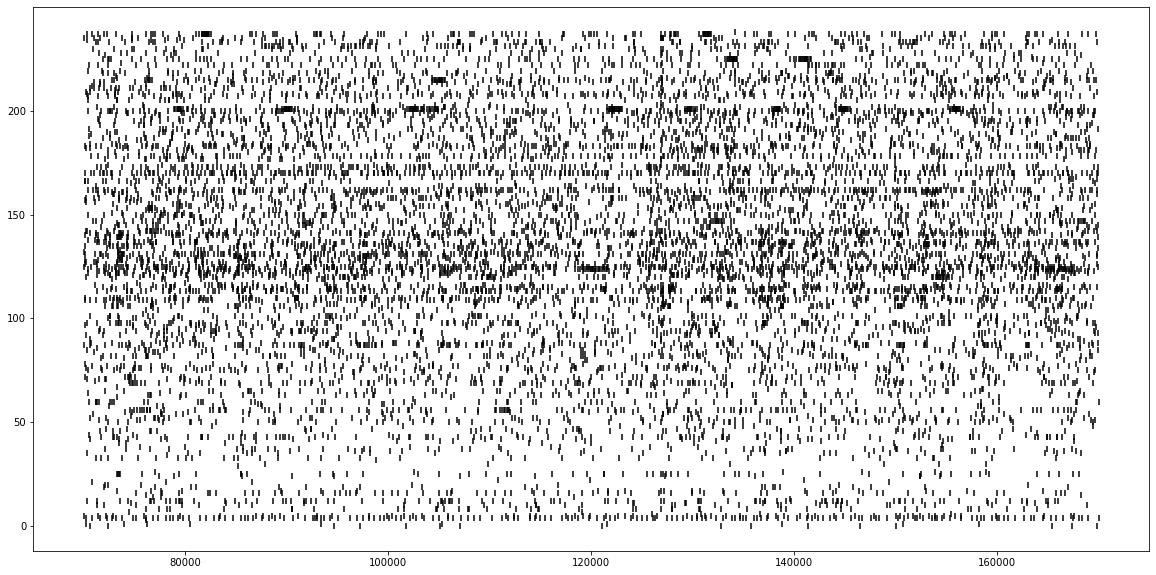

In [77]:
spikes = manager.get_spikes(start=70000, end=170000)
fig, ax = plt.subplots(figsize=(20, 10))
for i, unit in enumerate(spikes):
    ax.scatter(unit, np.ones_like(unit)*i, marker='|', c='k')
plt.show()